Analysis of the performance of the MQ Encoder/Decoder with the original tabular values for `qe`.

In [1]:
import numpy as np
import pandas as pd
from glob import glob
%matplotlib inline

In [2]:
from itertools import chain
import os

In [3]:
basenames = glob("./*.residual")
uncompressed = dict(
    residual = sorted([x for x in basenames]), 
    nolzc = sorted([x+'.nlzc' for x in basenames]),
    bplanes = sorted([x+'.bplanes' for x in basenames]),
)
compressed = dict(
    residual = sorted([x+'.mq' for x in basenames]),
    nolzc = sorted([x+'.nlzc.mq' for x in basenames]),
    bplanes = sorted([x+'.bplanes.mq' for x in basenames]),
)
merged = chain.from_iterable([x for x in uncompressed.values()]+[x for x in compressed.values()])
merged = [x for x in merged]

In [4]:
index = [x[2:-9] for x in basenames]
df = pd.DataFrame([], index=index)
df.head()

""
emac.ml.tvirt.f32.little.5x90x160x320_1.raw
emac.ml.qm1.f32.little.5x90x160x320_0.raw
icon.pl.tempv.f32.little.4x47x351x901_3.raw
icon.pl.qc.f32.little.4x47x351x901_0.raw
icon.pl.u.f32.little.4x47x351x901_0.raw


In [5]:
df['residual'] = [os.path.getsize(x+'.residual') for x in df.index]
df['nlzc'] = [os.path.getsize(x+'.residual.nlzc') for x in df.index]
df['bplanes'] = [os.path.getsize(x+'.residual.bplanes') for x in df.index]
df['residual.mq'] = [os.path.getsize(x+'.residual.mq') for x in df.index]
df['nlzc.mq'] = [os.path.getsize(x+'.residual.nlzc.mq') for x in df.index]
df['bplanes.mq'] = [os.path.getsize(x+'.residual.bplanes.mq') for x in df.index]
df.head()

,residual,nlzc,bplanes,residual.mq,nlzc.mq,bplanes.mq
emac.ml.tvirt.f32.little.5x90x160x320_1.raw,18432000,8826000,8826000,17397026,8912677,8333218
emac.ml.qm1.f32.little.5x90x160x320_0.raw,18432000,9444524,9444524,17753567,9535938,8958885
icon.pl.tempv.f32.little.4x47x351x901_3.raw,59455188,15433016,15433016,36185706,15544158,14188855
icon.pl.qc.f32.little.4x47x351x901_0.raw,59455188,1217448,1217448,1816555,1229442,1186087
icon.pl.u.f32.little.4x47x351x901_0.raw,59455188,23567476,23567476,44222876,23798214,22417868


In [6]:
df['residual.cr'] = df['residual.mq']/df['residual']
df['nlzc.cr'] = df['nlzc.mq']/df['nlzc']
df['bplanes.cr'] = df['bplanes.mq']/df['bplanes']
df.sort_index(inplace=True)

# Cleanup of data

In [7]:
nlzc_too_small = df.loc[df['nlzc']<1000000].index
for x in nlzc_too_small:
    df.drop(x, axis=0, inplace=True)

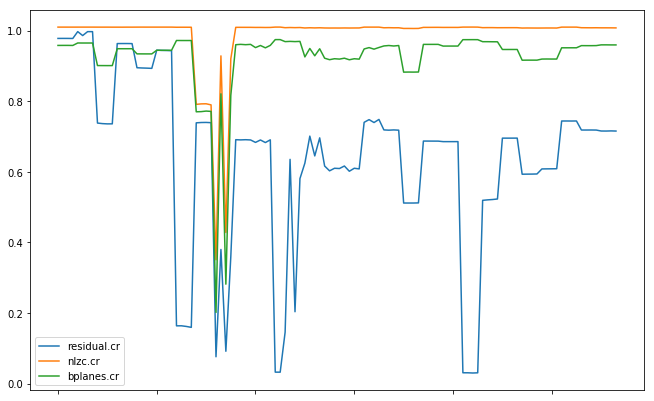

In [8]:
df.loc[:,[x for x in df.columns if "cr" in x]].sort_index().plot(figsize=(11,7));

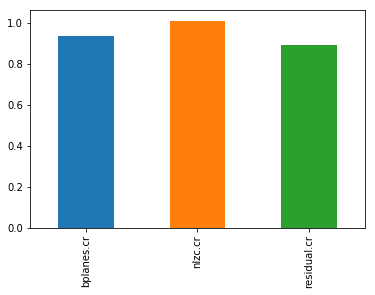

In [10]:
df = df.reindex(sorted(df.columns), axis=1)
df.loc['emac.ml.tm1.f32.little.5x90x160x320_3.raw',[x for x in df.columns if 'cr' in x]].plot.bar();

In [11]:
df.loc['emac.ml.tm1.f32.little.5x90x160x320_3.raw',[x for x in df.columns if 'cr' in x]]

bplanes.cr     0.933927
nlzc.cr        1.009803
residual.cr    0.892953
Name: emac.ml.tm1.f32.little.5x90x160x320_3.raw, dtype: float64

In [12]:
![title](../pics/correlation_window.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")
